In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('cluster_example_data.csv')
data = data.values

In [3]:
np.random.shuffle(data)

In [4]:
X = data[:,:-1]
ids = data[:,-1]

In [5]:
X

array([[48, 18],
       [40,  3],
       [60,  2],
       [34, 18],
       [30,  3],
       [30,  2],
       [25,  5],
       [48,  4],
       [24, 10],
       [60, 19],
       [25,  3],
       [44,  2],
       [52, 10],
       [44,  8],
       [34, 22],
       [52,  2],
       [34, 15],
       [44, 12],
       [25, 15],
       [52,  4],
       [52,  4],
       [38, 20],
       [48,  5],
       [52, 22],
       [34,  5],
       [25, 18]], dtype=int64)

In [6]:
import matplotlib.pyplot as plt

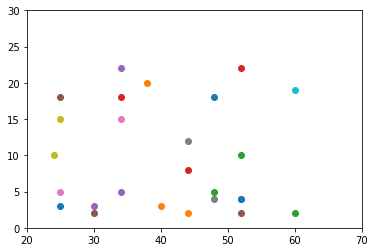

In [7]:
for V in X:
    plt.scatter(V[0],V[1])
plt.ylim(0, 30) # 경계 지정하기
plt.xlim(20, 70)
plt.show()

In [8]:
# Aggromerative 라는 계층적 군집 방식 이용 ( bottom-up 방식 )
# 반대로 Top-down 방식은 Divisive 라고 함 
from sklearn.cluster import AgglomerativeClustering

In [9]:
# single : 각 클러스터 구성하는 데이터 포인트 중 가장 가까운 데이터 포인트 간 거리 기준 
cluster_idf = AgglomerativeClustering(linkage='single', affinity='cosine', n_clusters=4).fit(X)

In [10]:
cluster_idf.labels_

array([0, 2, 2, 3, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 0, 0, 1, 2, 2, 3,
       2, 0, 2, 1], dtype=int64)

In [11]:
cluster_nums = []
for data_num, cluster_num in enumerate(cluster_idf.labels_): 
    cluster_nums.append(cluster_num)
    print(ids[data_num], cluster_num)

5 0
14 2
18 2
8 3
13 2
2 2
1 2
16 2
12 0
7 0
19 2
15 2
25 2
23 2
9 1
24 2
21 0
4 0
11 1
17 2
20 2
3 3
22 2
6 0
0 2
10 1


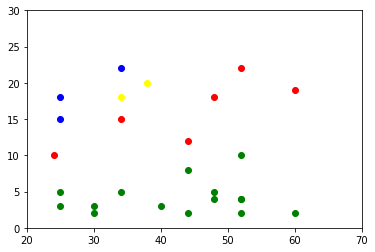

In [12]:
import matplotlib.pyplot as plt
for k in range(len(ids)):
    if cluster_nums[k] == 0:
        plt.scatter(X[k][0],X[k][1], c='red')
    elif cluster_nums[k] == 1:
        plt.scatter(X[k][0],X[k][1], c='blue')
    elif cluster_nums[k] == 2:
        plt.scatter(X[k][0],X[k][1], c='green')
    elif cluster_nums[k] == 3:
        plt.scatter(X[k][0],X[k][1], c='yellow')
plt.ylim(0, 30) # 경계 지정하기
plt.xlim(20, 70)
plt.show()

In [13]:
# ward: 계층적 군집에서 두 개의 클러스터가 합쳐질 떄, 데이터 포인트들이 갖는 분사이 가장 작은 클러스터끼리 묶는 방식 
cluster_idf1 = AgglomerativeClustering(linkage='ward', n_clusters=4).fit(X)

In [14]:
cluster_idf1.labels_

array([3, 0, 0, 1, 2, 2, 2, 0, 2, 3, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 3, 2, 1], dtype=int64)

5 3
14 0
18 0
8 1
13 2
2 2
1 2
16 0
12 2
7 3
19 2
15 0
25 0
23 0
9 1
24 0
21 1
4 0
11 1
17 0
20 0
3 1
22 0
6 3
0 2
10 1


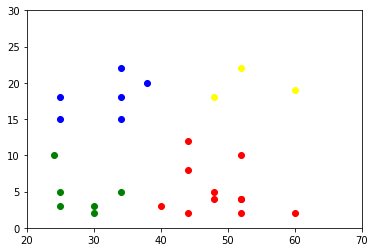

In [15]:
cluster_nums = []
for data_num, cluster_num in enumerate(cluster_idf1.labels_): 
    cluster_nums.append(cluster_num)
    print(ids[data_num], cluster_num)
for k in range(len(ids)):
    if cluster_nums[k] == 0:
        plt.scatter(X[k][0],X[k][1], c='red')
    elif cluster_nums[k] == 1:
        plt.scatter(X[k][0],X[k][1], c='blue')
    elif cluster_nums[k] == 2:
        plt.scatter(X[k][0],X[k][1], c='green')
    elif cluster_nums[k] == 3:
        plt.scatter(X[k][0],X[k][1], c='yellow')
plt.ylim(0, 30) # 경계 지정하기
plt.xlim(20, 70)
plt.show()

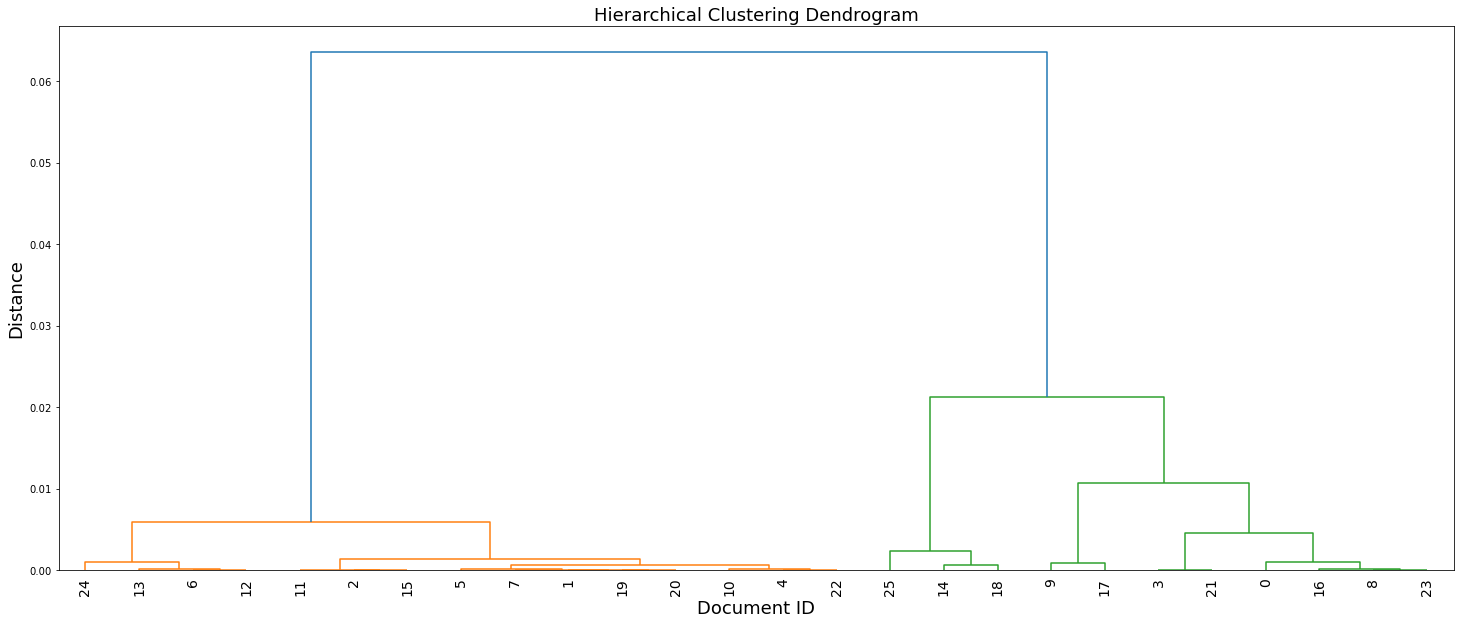

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage
# 시각화 라이브러리가 아닌 바로 시각화 이용 가능한 기능 
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)
Z = linkage(X, 'average', metric='cosine')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram', fontsize=18)
plt.xlabel('Document ID', fontsize=18)
plt.ylabel('Distance', fontsize=18)
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=14.,  # font size for the x axis labels
)
plt.show()